决策树：基于树结构进行决策，决策过程的每个判定问题都是对某个属性的“测试”。一般只包含一个根节点、若干个内部节点及若干个叶子节点。

决策树学习的目的：产生一颗泛化能力强的决策树。

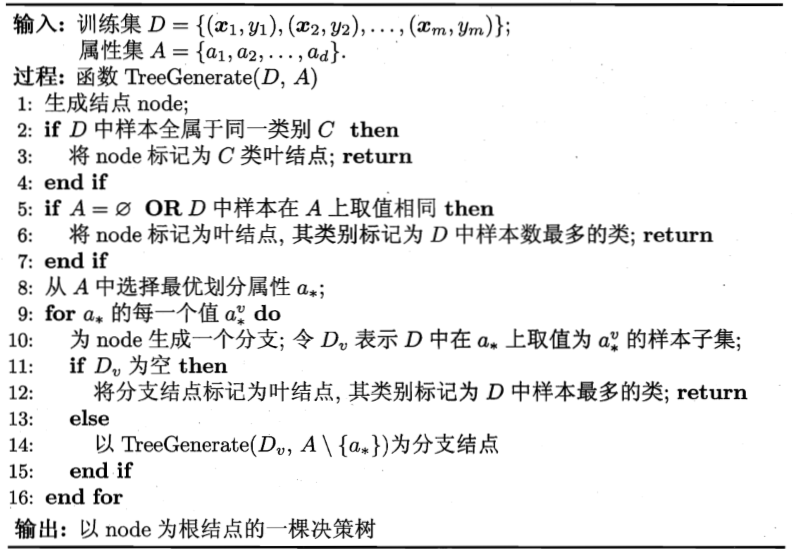

In [2]:
from IPython.display import Image
libo="C:/Users/libo/Desktop/machine learning/西瓜书/西瓜书图片/"
Image(filename = libo + "4.png", width=500, height=60)

决策树的生成是个递归的过程，能发现三种导致递归返回的情况：
1、当前节点所包含的样本全部属于同一类，无需划分。这时将结点化为叶子结点，样本属于该类别。
2、属性集为空或者数据集在当前属性集上所有取值相同，无法划分。这时将结点化为叶子结点并将样本归属于多数类。
3、当前节点所包含的样本集合为空，不能划分。这时将结点化为叶子结点并将样本归属于父节点的多数类。

划分选择目标：决策树的分支节点所包含的样本尽可能的属于同一个类别，即节点纯度越来越高。

信息熵：度量样本集合纯度的一种指标。集合D中第K类样本所占的比例为$Pk(k=1,2,\cdots , |y|)$  则D中信息熵定义为：$Ent(D)=-\sum_{k=1}^{|y|}P_klog_2P_k$ 熵越小，纯度越高。

信息增益：当用一个属性对样本进行划分后，分开的不同样本集合的信息墒之和最小，即总纯度最高，那么这个属性就是目前最好的划分选择。原始信息熵与新的划分后的信息墒之差就是这次属性划分的“信息增益”。所以我们的属性划分选择就是在每个结点找到最高信息增益的属性。  $Gain(D,a)=Ent(D)-\sum_{v=1}^V\frac{|D^v|}{|D|}Ent(D^v)$

计算过程：1.算出初始数据集的信息熵 2.算出每一种属性的信息熵 3.算出每一种属性的信息增益 4.取信息增益最大的属性为划分属性 5.对新划分出来的数据集求余下属性的信息熵 6.重复2--5操作。

增益率：信息增益准则对可取值数目较多的属性有所偏好，为减少这种偏好可能带来的不利影响，选择增益率来选择最优划分属性。增益率是让信息增益除以选择的划分属性的“固有值”，属性a的可能取值数目越多，则固有值越大，所以信息增益除以固有值后，抵消了信息增益对取值数目多的属性的偏好。
最优属性划分方法：但是这样对取值少的反而更加偏爱了，所以，采用先从候选划分属性中选出信息增益高于平均水平的属性，再从中选择增益率最高的。

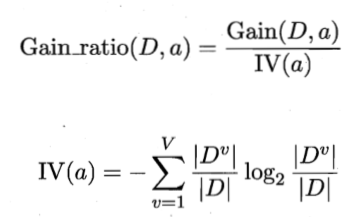

In [5]:
from IPython.display import Image
libo="C:/Users/libo/Desktop/machine learning/西瓜书/西瓜书图片/"
Image(filename = libo + "5.png", width=300, height=60)

基尼值（Gini(D)）：从数据集中随机抽取两个样本，其类别标记不一致的概率。值越小，D纯度越高。  $Gini(D)=\sum_{k=1}^{|y|}\sum_{k^`}PkPk^`$
基尼指数：原始基尼值与新划分后的不同样本集合的基尼值之和的差值就是“基尼指数”（Gini_index）,属性划分选择就是在每个结点找到划分后最高基尼指数的属性。

$Gini\_index(D,a)=\sum_{v=1}^V\frac{|D^v|}{|D|}Gini(D^v)$

剪枝处理：解决过拟合的办法。不断的进行结点划分，有时会造成决策树分支过多，将训练集
自身的一些特点当作普遍化特征进行学习而会导致过拟合。故主动去掉一些分支，方法：1.预剪枝 2.后剪枝

预剪枝：在决策树生成过程中，对每个结点在划分前后进行估计，若当前结点的划分不能带来
决策树泛化性能提升，则停止划分并将当前结点标记为叶结点。
后剪枝：在训练出一颗完整的决策树之后，自底向上的对非叶结点进行考察，若将该结点对应
的子树替换成叶结点能提升泛化性能，则将该子树替换为叶结点。

两者区别：后剪枝通常比预剪枝保留了更多的分支。一般情况下，后剪枝泛化性能优于预剪枝。但是后剪枝开销时间大得多。

连续值的处理：由于可取数目不再有限，故将连续值转换为离散值：将训练样本中该属性的所有取值进行排序，并对这排好序的取值队列进行分区划分，每一个分区即为该属性的一个离散点取值。则共有（n-1）个分区点。选取使信息增益最大的点。

缺失值处理：带来的2个问题：
1.属性值缺失的情况下如何进行属性划分？ 
2.划分属性为空时，它应该被分到哪个子节点中？

1.不将缺失值的样本代入选择判断的公式计算（信息增益、增益率、基尼指数）之中，只在计算完后乘以一个有值的样本比例即可。
比如训练集有10个样本，在属性 a 上，有两个样本缺失值，那么计算该属性划分的信息增益时，我们可以忽略这两个缺失值的样本来计算信息增益，然后在计算结果上乘以8/10即可。

$p_k = \frac{\sum_{x \in D_k}{w_x}}{\sum_{x \in D}{w_x}}$  $(1 \leq k \leq{|y|})$

$Ent(D) = -\sum_{k=1}^{|y|}p_klog_2p_k$

|y|表示结果种类数（瓜分为好瓜坏瓜：2种），Pk表示该种结果占所取总样本的比例。

在属性划分前与属性划分后取差值后再乘以无缺失样本所占比例，得信息增益，再根据大小进行划分。

2.若样本 x 在划分属性 a 上取值未知，则将 x 划入所有子结点，但是对划入不同子结点中的 x 赋予不同的权值（不同子结点上的不同权值一般体现为该子结点所包含的数据占父结点数据集合的比例）。

多变量决策树：每个属性视作坐标空间中的一个坐标轴，样本变为了一个数据点，样本分类则是找不同类样本的边界。先前的分类都是平行于坐标轴的边界，如果边界比较复杂，则划分过于麻烦。于是提出使用斜边界划分。

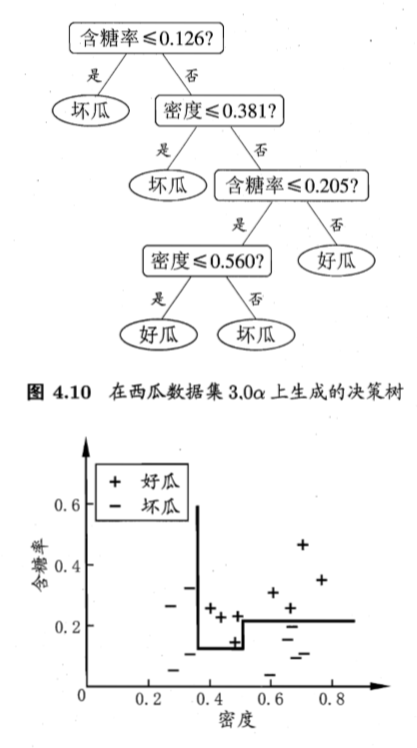

In [7]:
libo="C:/Users/libo/Desktop/machine learning/西瓜书/西瓜书图片/"
Image(filename = libo + "6.png", width=300, height=60)

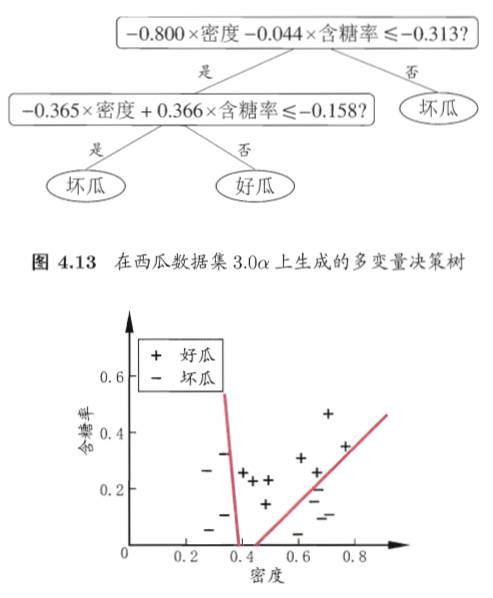

In [8]:
libo="C:/Users/libo/Desktop/machine learning/西瓜书/西瓜书图片/"
Image(filename = libo + "7.png", width=300, height=60)

https://www.jianshu.com/p/d80fbec52f09  忍不住要收藏。